# **Aproximadores Universales**

**Equipo:**
* Integrante 1 (XX%)
* Integrante 2 (XX%)
* Integrante 3 (XX%)
* Integrante 4 (XX%)

## **Objetivo:**

Explorar el Teorema de Aproximación Universal utilizando un Perceptrón Multicapa (MLP) para aproximar diversas funciones, comenzando con XOR y avanzando hacia funciones más complejas. Este laboratorio demuestra la capacidad de los MLP para aproximar funciones no lineales y reta a los estudiantes a experimentar con arquitecturas de modelos.

## **Tareas:**

1. **Aproximación de XOR**: Entrenar un MLP para aproximar la función XOR y evaluar su rendimiento utilizando el Error Cuadrático Medio (MSE).
2. **Funciones de Desafío**: Aproximar tres funciones complejas, ajustando la arquitectura del MLP según sea necesario.

   * Función 1: Sinusoidal con decaimiento
   * Función 2: Polinómica por tramos con raíz
   * Función 3: Trigonométrica y polinómica combinada en 2D
3. **Reportar Resultados**: Entregar el análisis y los resultados en Canvas y compartir el RMSE y las gráficas.

## **Entregables**

1. **Canvas**: Entregar el Notebook de Colab con el código, valores de MSE y análisis.
2. **Foro**: Publicar los valores finales de RMSE para cada función y el número de parámetros que utilizaron.

# **Parte 1: Explorando la Propiedad de Aproximación Universal con XOR**


#### **Importar librerias**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.__version__

'2.0.2'

#### **Definir la función XOR**

In [ ]:
# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

#### **Construir una MLP para XOR**

In [ ]:
# Define a simple MLP
class MLP_XOR(nn.Module):
    def __init__(self):
        super(MLP_XOR, self).__init__()
        self.layer1 = nn.Linear(2, 4) # Crear una capa de neuronas ocultas, no tiene función de activation
        # (2, 4) (input, output) | (4, 1)
        self.layer2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x)) # Funciones de activacion
        x = torch.sigmoid(self.layer2(x))
        return x

model_xor = MLP_XOR()

#### **Entrenar una MLP para XOR**

In [ ]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_xor.parameters(), lr=0.1)

# Training loop
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    output = model_xor(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/500], Loss: {loss.item():.4f}')

Epoch [10/500], Loss: 0.2343
Epoch [20/500], Loss: 0.1793
Epoch [30/500], Loss: 0.1676
Epoch [40/500], Loss: 0.1669
Epoch [50/500], Loss: 0.1668
Epoch [60/500], Loss: 0.1667
Epoch [70/500], Loss: 0.1667
Epoch [80/500], Loss: 0.1667
Epoch [90/500], Loss: 0.1667
Epoch [100/500], Loss: 0.1667


#### **Visualización del error de entrenamiento (MSE)**

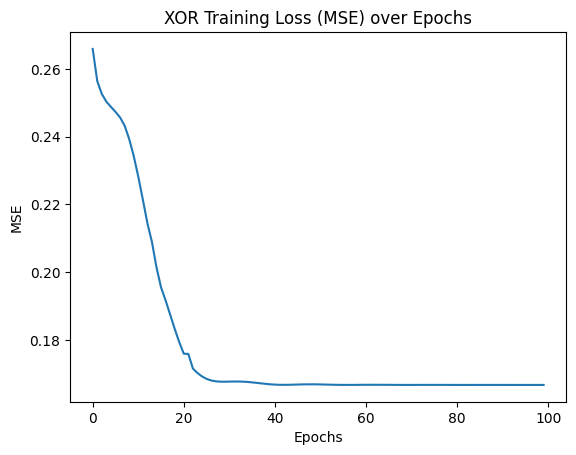

In [ ]:
# Plot MSE over epochs
plt.plot(losses)
plt.title('XOR Training Loss (MSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

#### **Revisar predicciones**

In [ ]:
# Predictions for XOR
with torch.no_grad():
    predictions_xor = model_xor(X).round()
print("Predicted values for XOR inputs:", predictions_xor)

Predicted values for XOR inputs: tensor([[0.],
        [0.],
        [1.],
        [0.]])


#### **Original vs Aproximación**

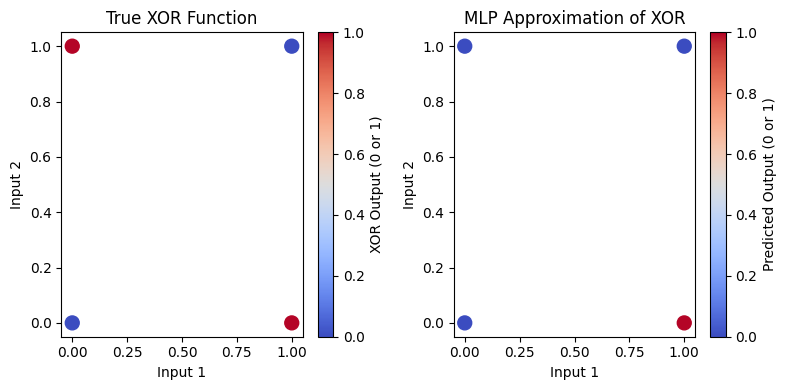

In [ ]:
# True XOR values for each input pair
true_xor_outputs = y.numpy()

# Network predictions
with torch.no_grad():
    predicted_xor_outputs = model_xor(X).numpy()

# Separate the data for plotting
inputs = X.numpy()
predictions = predicted_xor_outputs.round()  # Round to nearest integer (0 or 1) for visualization
true_outputs = true_xor_outputs

# Set up a plot to show the XOR predictions vs actual values
plt.figure(figsize=(8, 4))

# Plot the true XOR outputs
plt.subplot(1, 2, 1)
plt.scatter(inputs[:, 0], inputs[:, 1], c=true_outputs.squeeze(), cmap="coolwarm", marker="o", s=100)
plt.title("True XOR Function")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.colorbar(label="XOR Output (0 or 1)")

# Plot the network's approximation
plt.subplot(1, 2, 2)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions.squeeze(), cmap="coolwarm", marker="o", s=100)
plt.title("MLP Approximation of XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.colorbar(label="Predicted Output (0 or 1)")

plt.tight_layout()
plt.show()

## **2. Desafío – Aproximación de Funciones No Triviales**

En esta sección, crearás MLPs para aproximar las siguientes funciones. Ajusta la arquitectura y experimenta con diferentes parámetros según sea necesario.


#### **Función 1: Sinusoidal con Variación de Frecuencia**

In [ ]:
# Generating data for f(x) = sin(5x) * exp(-0.1x)
x1 = np.linspace(0, 10, 500)
y1 = np.sin(5 * x1) * np.exp(-0.1 * x1)

#### **Función 2: Función por Tramos**


In [ ]:
# Generating data for piecewise function
x2 = np.linspace(-5, 5, 500)
y2 = np.where(x2 < 0, x2**3, np.sqrt(np.abs(x2)))

#### **Función 3: Función 2D con Operaciones Mixtas**

In [ ]:
# Generating data for f(x, y) = sin(x) * cos(y) + x^2 - y^2
x3 = np.linspace(-5, 5, 100)
y3 = np.linspace(-5, 5, 100)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = np.sin(X3) * np.cos(Y3) + X3**2 - Y3**2

## **3. Análisis y Discusión**

#### **Preguntas para el Análisis**

* ¿Cómo afectaron los cambios en la arquitectura del MLP a la aproximación de cada función?
* ¿Qué funciones fueron más fáciles o más difíciles de aproximar, y por qué?
* ¿Qué aprendizajes obtienes sobre los MLP y el Teorema de Aproximación Universal?
